# Employee Retention Classifier

This is a simple Estimator/Classifier based on a Logistic regression Model which would classify the retention of a employee (whether the employee is likely to leave the firm or not) based on the given input features.

In [464]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()

# Loading Data# 

In [465]:
retention = pd.read_csv('C:/Users/LENOVO/# Jupyter Notebook Files/Machine Learning/Resources/py/ML/7_logistic_reg/Exercise/HR_comma_sep.csv')
retention

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


# Data Cleaning

* Detecting Null Values

In [466]:
retention.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

There seem to be no Null Values in the Data

* Converting Categorical data to Numerical data

In [467]:
dept_dummies = pd.get_dummies(retention['Department'])
dept_dummies.pop('technical')
salary_dummies = pd.get_dummies(retention['salary'])
salary_dummies.pop('medium')

dept_dummies = pd.concat([dept_dummies,salary_dummies],axis='columns')
retention= pd.concat([retention,dept_dummies],axis='columns')

retention.drop(['Department','salary'],axis=1,inplace=True)
retention

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,high,low
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0,1
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0,1
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,0,0,0,0,0,0,1,0,1
14995,0.37,0.48,2,160,3,0,1,0,0,0,0,0,0,0,0,0,1,0,1
14996,0.37,0.53,2,143,3,0,1,0,0,0,0,0,0,0,0,0,1,0,1
14997,0.11,0.96,6,280,4,0,1,0,0,0,0,0,0,0,0,0,1,0,1


* Removing redudant Features

In [468]:
retention.pop('time_spend_company')

0        3
1        6
2        4
3        5
4        3
        ..
14994    3
14995    3
14996    3
14997    4
14998    3
Name: time_spend_company, Length: 14999, dtype: int64

# Data Visualization 

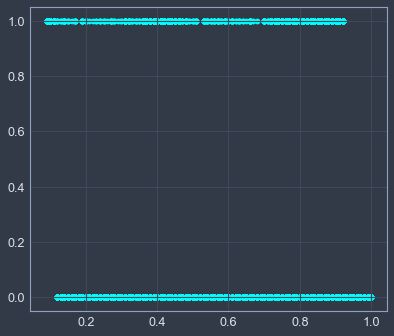

In [469]:
plt.scatter(retention.satisfaction_level,retention.left,color='cyan')

This is a CLassfication Ptoblem, and hence a Logistic Regression Model would be suitable.

# Train Test Data set Split

In [470]:
from sklearn.model_selection import train_test_split

In [471]:
y = retention.pop('left')
x = retention
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)

# Model Creation

In [472]:
from sklearn.linear_model import LogisticRegression

In [473]:
linear_classifier = LogisticRegression()

# Training the Model

In [474]:
linear_classifier.fit(x_train,y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Testing the Model

In [475]:
test_result = linear_classifier.predict(x_test)
df = pd.DataFrame(test_result,columns=['result'])

# Accuracy of the Model

In [476]:
score = linear_classifier.score(x_test,y_test)
print("The Model predicted the problem Retention problem with a Accuracy of {} % ".format(int(score*100)))

The Model predicted the problem Retention problem with a Accuracy of 80 % 


# General Observation of the Test

In [477]:
total = df.count()
no_of_retained = df.sum()
no_of_left = total - no_of_retained
result = {'Left':no_of_left,'Retained':no_of_retained}
stat = pd.DataFrame(result)
stat

,Left,Retained
result,5211,789
